In [ ]:
#We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?

In [3]:
import pandas as pd 
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [9]:

from pandas_datareader import data


In [6]:
from datetime import datetime

In [7]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [11]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [18]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [21]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,98.195860,95.381719,96.781917,96.841106,1.569923e+08,96.555759
std,22.533056,22.030659,22.451754,22.259125,7.013829e+07,22.403894
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.267502,77.625000,78.292503,78.262497,1.093488e+08,77.776558
50%,95.375000,93.712502,94.187500,95.040001,1.378164e+08,94.705559
75%,118.709999,115.260002,116.970001,116.589996,1.875728e+08,116.399178
max,138.789993,134.339996,138.050003,136.690002,4.268848e+08,136.690002


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-13 to 2021-01-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

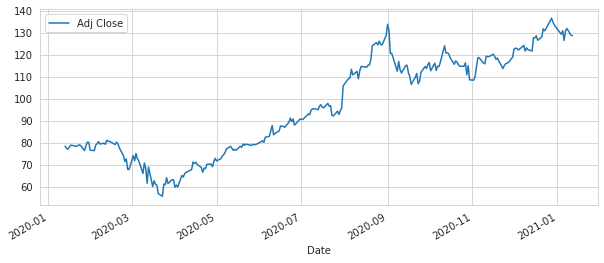

In [28]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

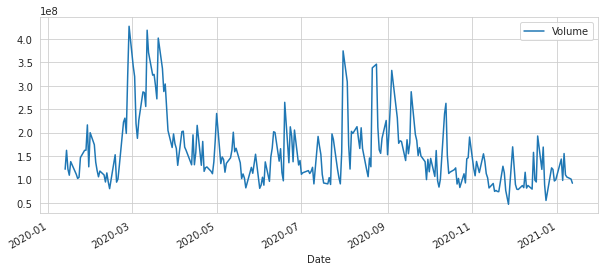

In [29]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [36]:
ma_day = [10,20,50] 

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    
    AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],ma).mean()

<AxesSubplot:xlabel='Date'>

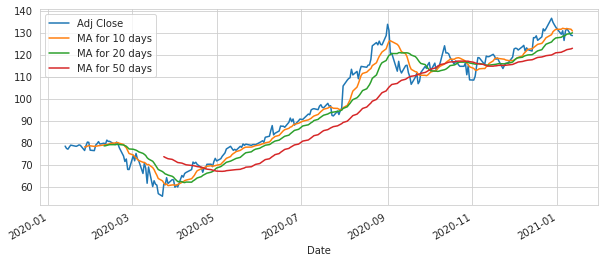

In [37]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

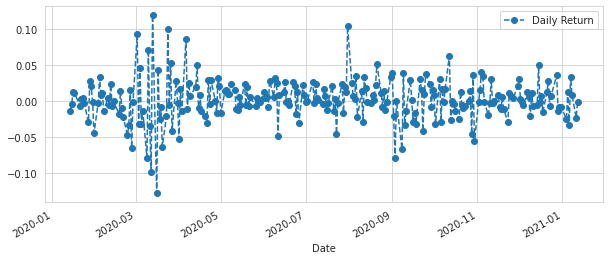

In [40]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

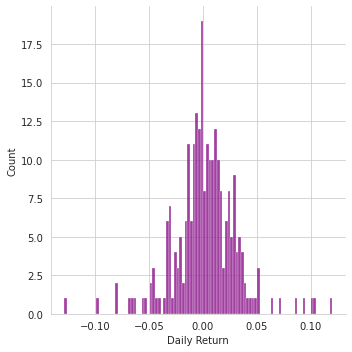

In [45]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

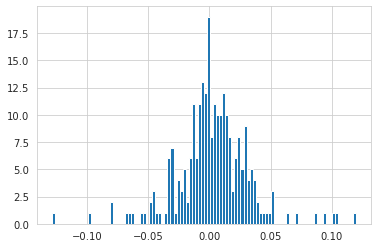

In [42]:
AAPL['Daily Return'].hist(bins=100)

In [46]:
closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [47]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,78.561531,1439.229980,161.568405,1891.300049
2020-01-14,77.500702,1430.880005,160.430450,1869.439941
2020-01-15,77.168564,1439.199951,161.469452,1862.020020
2020-01-16,78.135223,1451.699951,164.428116,1877.939941
2020-01-17,79.000244,1480.390015,165.348358,1864.719971


In [48]:
tech_rets = closing_df.pct_change()

In [49]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040


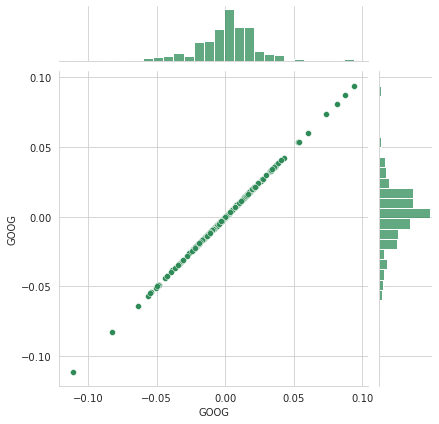

In [52]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

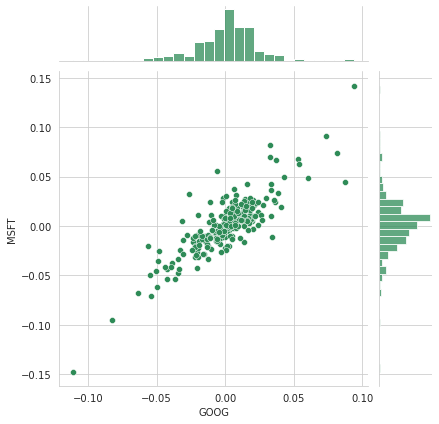

In [53]:
sns.jointplot(x='GOOG',y='MSFTPlay￼
Rewind 5s
￼1Playback rate
￼
Forward 5s
8:48 / 18:06
￼
Add note
￼
￼
Transcript
￼Captions
￼Settings￼
Fullscreen￼
',data=tech_rets,kind='scatter',color='seagreen')

In [54]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-13,NaN,NaN,NaN,NaN
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040


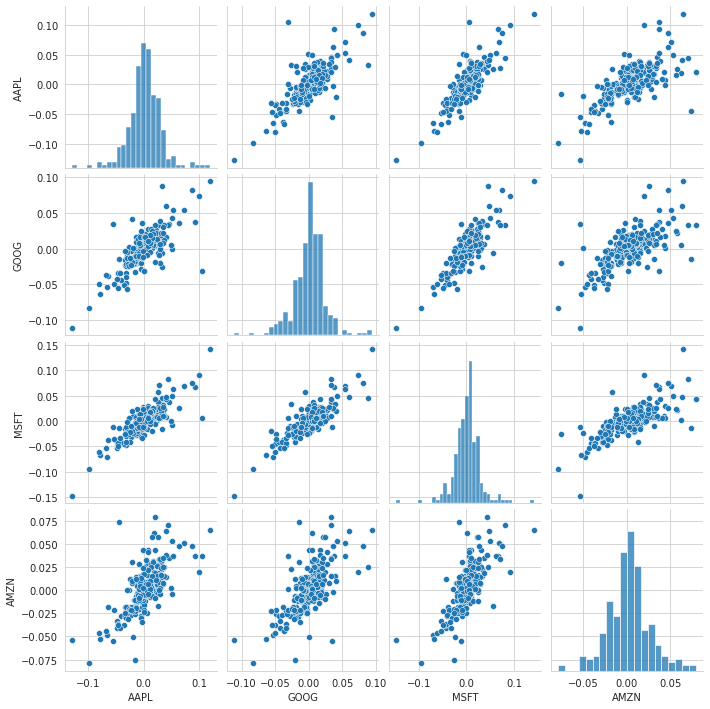

In [55]:
sns.pairplot(tech_rets.dropna())

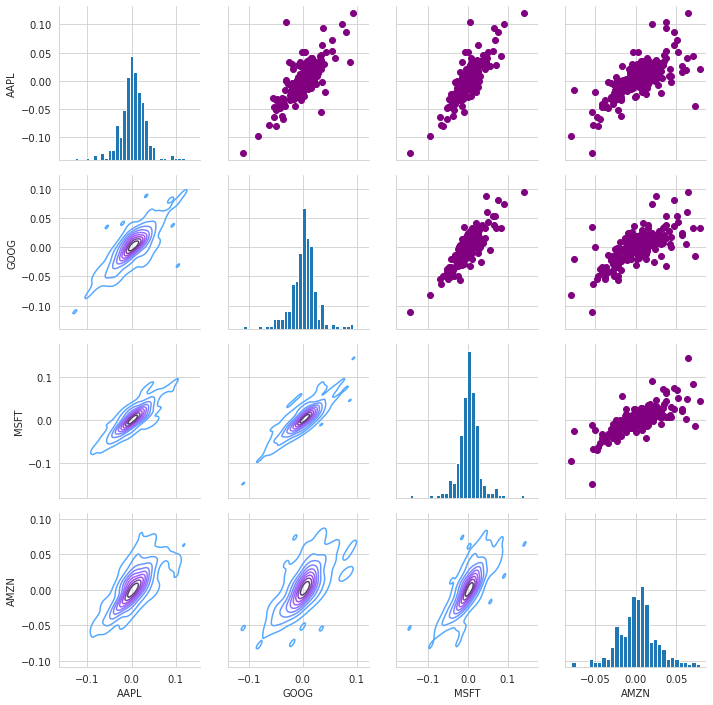

In [60]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

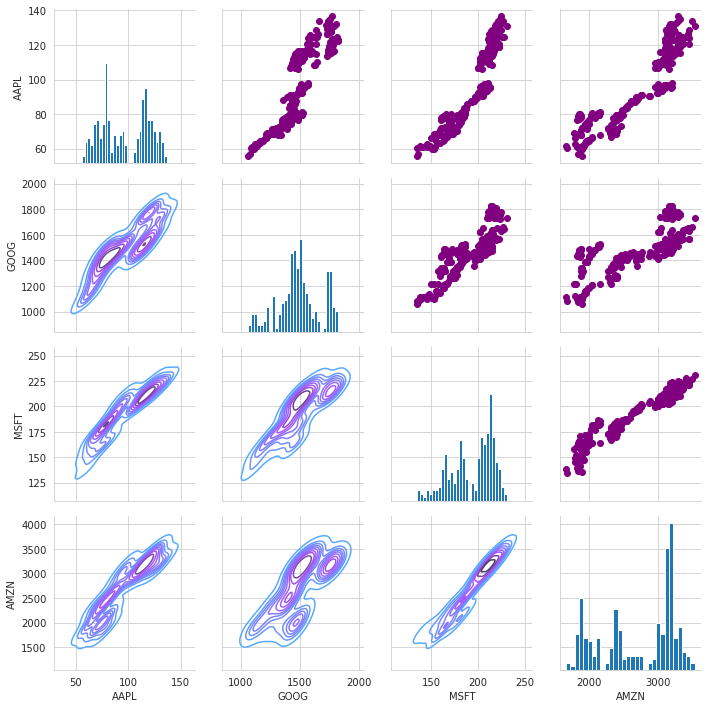

In [62]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

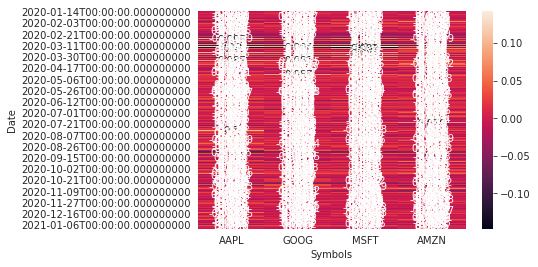

In [64]:
sns.heatmap(tech_rets.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

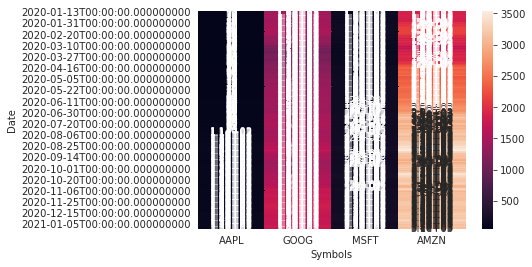

In [66]:
sns.heatmap(closing_df,annot=True)

In [67]:
# Risk Analysis

In [68]:
rets = tech_rets.dropna()

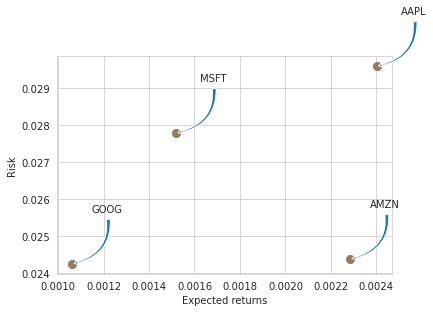

In [83]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)


# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.5'))



In [87]:
# Value At Risk--amount of money putting at risk 
#1. Bootstrap method
#2. Montecarlo method

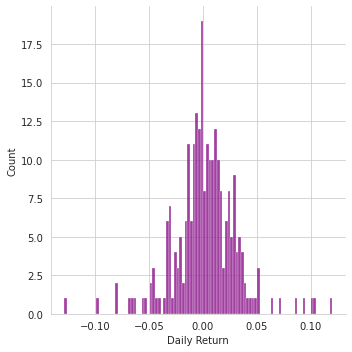

In [92]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [93]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-01-14,-0.013503,-0.005802,-0.007043,-0.011558
2020-01-15,-0.004286,0.005815,0.006476,-0.003969
2020-01-16,0.012527,0.008685,0.018323,0.008550
2020-01-17,0.011071,0.019763,0.005597,-0.007040
2020-01-21,-0.006777,0.002709,-0.003591,0.014630


In [104]:
rets['AMZN'].quantile(0.050)

-0.03699179374484024

In [105]:
# MONTE CARLO METHOD

In [106]:
days = 365 

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']


In [107]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

In [108]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-13,1440.520020,1426.020020,1436.130005,1439.229980,1652300,1439.229980
2020-01-14,1441.800049,1428.369995,1439.010010,1430.880005,1558900,1430.880005
2020-01-15,1441.395020,1430.209961,1430.209961,1439.199951,1282700,1439.199951
2020-01-16,1451.989990,1440.920044,1447.439941,1451.699951,1173700,1451.699951
2020-01-17,1481.295044,1458.219971,1462.910034,1480.390015,2396200,1480.390015


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

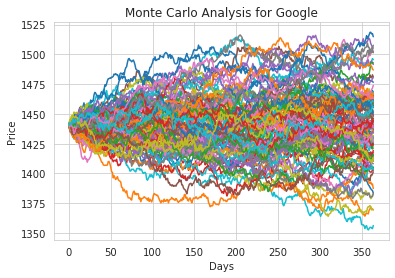

In [109]:
start_price = 1440.520020

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')

plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [110]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

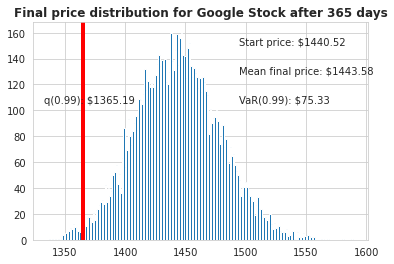

In [111]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');